In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import math

# Problem 2, question a)

In [2]:
data=np.loadtxt('Data11.dat')

In [3]:
data

array([4.00000000e+03, 4.00000000e+00, 2.08000004e-01, ...,
       3.17675360e+03, 3.17903420e+03, 3.17946570e+03])

In [4]:
Ndata=np.size(data);
Ncells=40;
tc=(np.zeros(Ncells+1)).astype(int)
tc[0:Ncells]=np.where(data == 4000)[0][:] #find rows in the data delimiting neurons spike trains
tc[Ncells]=Ndata #add last row

In [5]:
tc

array([     0,  12826,  14378,  16358,  17773,  26429,  35237,  36828,
        40682,  44401,  53770,  65715,  76436,  78324,  80714,  97951,
       105388, 110134, 111033, 120671, 122091, 124761, 126622, 129627,
       132790, 137798, 139684, 140577, 141720, 144060, 146907, 149223,
       151913, 153290, 156096, 158963, 160077, 161065, 166786, 169728,
       172601])

# Problem 2, question b)

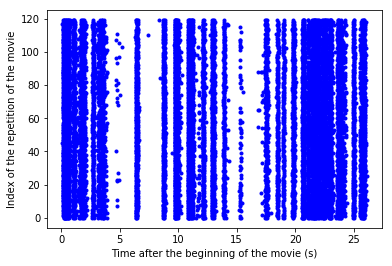

In [6]:
T=26.5 #duration of the movie
data0=data[tc[0]+2:tc[1]] #extract spiking times for neuron 0
x=data0%T #modulo operation: gives the remainder of the Euclidean division
y=data0//T #floor operation: gives the quotient of the Euclidean division
plt.plot(x,y,'b.')
ax = plt.gca()
ax.set_xlabel("Time after the beginning of the movie (s)")
ax.set_ylabel("Index of the repetition of the movie")
plt.show()

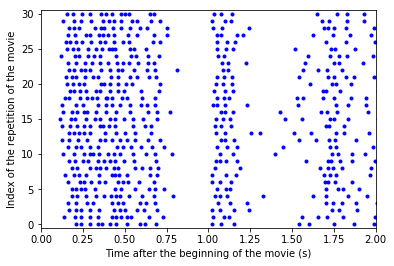

In [7]:
plt.xlim([0,2])
plt.ylim([-0.5,30.5])
plt.plot(x,y,'b.')
ax = plt.gca()
ax.set_xlabel("Time after the beginning of the movie (s)")
ax.set_ylabel("Index of the repetition of the movie")
plt.show()

# Problem 2, question c)

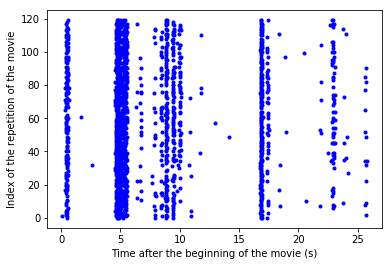

In [8]:
T=26.5 #duration of the movie
data1=data[tc[1]+2:tc[2]] #extract spiking times for neuron 1
x=data1%T #modulo operation: gives the remainder of the Euclidean division
y=data1//T #floor operation: gives the quotient of the Euclidean division
plt.plot(x,y,'b.')
ax = plt.gca()
ax.set_xlabel("Time after the beginning of the movie (s)")
ax.set_ylabel("Index of the repetition of the movie")
plt.show()

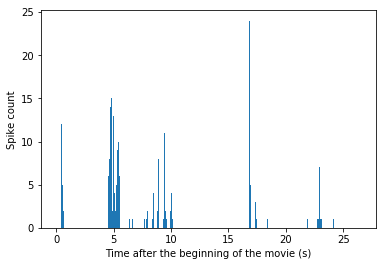

In [9]:
B=np.floor(T/0.01).astype(int)+1 #time bin =10 ms=0.01 s
plt.hist(x, np.linspace(0,T,B))
ax = plt.gca()
ax.set_xlabel("Time after the beginning of the movie (s)")
ax.set_ylabel("Spike count")
plt.show()

# Problem 2, question d)

In [10]:
Nr=120 #number of times the movie is repeated
Nn=40 #number of neurons
B=np.floor(T/0.01).astype(int)+1 #time bin =10 ms=0.01 s
freqs=np.zeros((B-1,Nn)) #each row is a time bin, each column is a different neuron
for i in range(Nn):
    datai=data[tc[i]+2:tc[i+1]]
    tt=datai%T
    freqs[:,i]= np.histogram(tt, np.linspace(0,T,B))[0]/Nr #divide by Nr to get the frequency that a neuron spikes in this bin

# Problem 2, question e)

In [11]:
ind = np.unravel_index(np.argmax(freqs, axis=None), freqs.shape)
print(ind)
freqs[7,14]

(7, 14)


1.7166666666666666

In [12]:
freqs[freqs > 1] = 1 #to approximately deal with the case where two spikes may end up in the same bin

# Problem 2, question f)

In [13]:
means=2*freqs-1
means

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

# Problem 2, question g)

In [14]:
timemeans=np.mean(means,0)
timemeans

array([-0.91934591, -0.99025157, -0.98755975, -0.99111321, -0.94631447,
       -0.94468553, -0.99000629, -0.97577358, -0.97662264, -0.94111321,
       -0.92525157, -0.93274214, -0.98813836, -0.98498113, -0.89362264,
       -0.95323899, -0.97016352, -0.99435849, -0.93939623, -0.99108176,
       -0.98322013, -0.98830818, -0.98111321, -0.9801195 , -0.96854088,
       -0.98815094, -0.99439623, -0.9928239 , -0.9852956 , -0.98210692,
       -0.98544654, -0.98311321, -0.9913522 , -0.98236478, -0.98244654,
       -0.99300629, -0.99379874, -0.96416981, -0.98150943, -0.9819434 ])

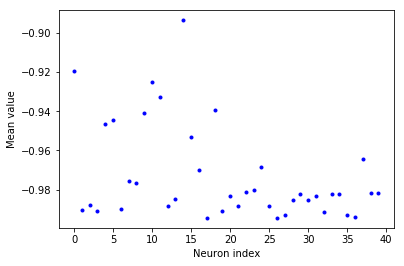

In [15]:
plt.plot(timemeans,'b.')
ax = plt.gca()
ax.set_xlabel("Neuron index")
ax.set_ylabel("Mean value")
plt.show()

# Problem 2, question h)

In [16]:
cov=np.zeros((Nn,Nn)) #covariance matrix
for i in range(Nn):
    for j in range(i,Nn): #the matrix will be symmetric
        cov[i,j]=np.mean(means[:,i]*means[:,j])-timemeans[i]*timemeans[j] 
        cov[j,i]=cov[i,j]

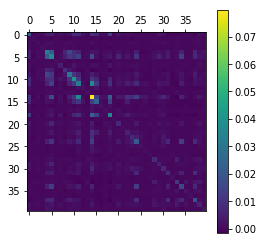

In [17]:
plt.matshow(cov);
plt.colorbar()
plt.show()

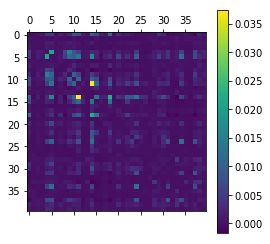

In [18]:
cov0=np.copy(cov)
for i in range(Nn):
    cov0[i,i]=0
plt.matshow(cov0);
plt.colorbar()
plt.show()

In [19]:
corr=np.zeros((Nn,Nn)) #correlation matrix
for i in range(Nn):
    for j in range(i,Nn): #the matrix will be symmetric
        corr[i,j]=cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        corr[j,i]=corr[i,j]

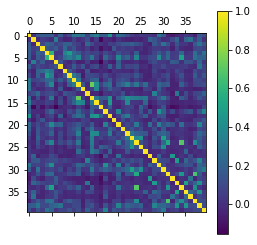

In [20]:
plt.matshow(corr);
plt.colorbar()
plt.show()

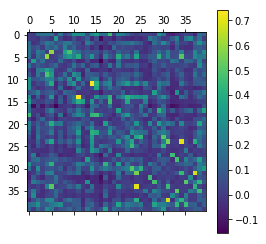

In [21]:
corr0=np.copy(corr)
for i in range(Nn):
    corr0[i,i]=0
plt.matshow(corr0);
plt.colorbar()
plt.show()

In [22]:
np.mean(corr[np.triu_indices(Nn, k = 1)])

0.08238450860582322

# Problem 2, question i)

In [23]:
coupl=np.linalg.inv(cov)

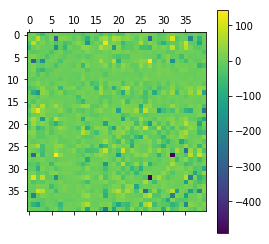

In [24]:
coupl0=np.copy(coupl)
for i in range(Nn):
    coupl0[i,i]=0
plt.matshow(coupl0);
plt.colorbar()
plt.show()